In [37]:
import numpy as np
import pandas as pd

## Exercises

For all of the datasets below, examine the data types of each column, ensure that the dates are in the proper format, and set the dataframe's index to the date column as appropriate.

For this exercise you'll need to install a library that will provide us access to some more datasets:

`pip install vega_datasets` 

You can use this library like so:

`from vega_datasets import data`  
`data.sf_temps()` 


Use the above dataset for the exercises below:

1. Resample by the day and take the average temperature. Visualize the average temperature over time.
2. Write the code necessary to visualize the minimum temperature over time.
3. Write the code necessary to visualize the maximum temperature over time.
4. Which month is the coldest, on average?
5. Which month has the highest average temperature?
6. Resample by the day and calculate the min and max temp for the day (Hint: `.agg(['min', 'max'])`). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?
7. **Bonus**: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

In [38]:
import vega_datasets as vd
df = vd.data.sf_temps()
df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [39]:
df.date = pd.to_datetime(df.date)
df = df.set_index('date')
df.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


### 1. Resample by the day and take the average temperature. Visualize the average temperature over time.
### 


<AxesSubplot:title={'center':'Average temp over time'}, xlabel='date'>

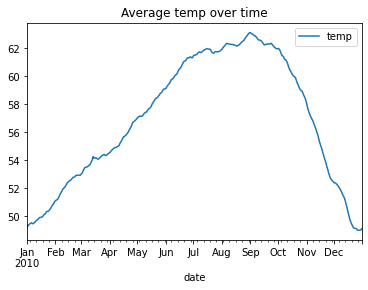

In [40]:
df.resample('d').mean().plot(title='Average temp over time')

### 2. Write the code necessary to visualize the minimum temperature over time.
### 


<AxesSubplot:title={'center':'Min temp over time'}, xlabel='date'>

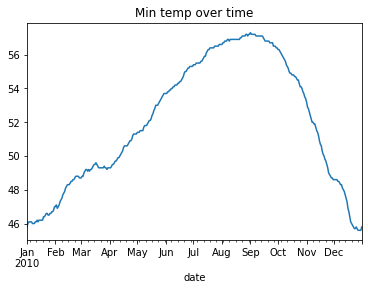

In [41]:
df.resample('d').min().plot(title='Min temp over time', legend=False)

### 3. Write the code necessary to visualize the maximum temperature over time.
### 


<AxesSubplot:title={'center':'Max temp over time'}, xlabel='date'>

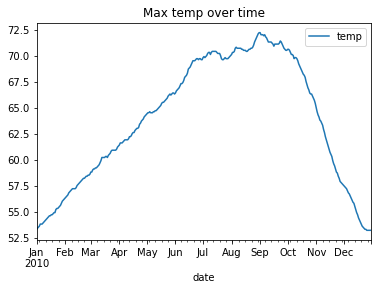

In [42]:
df.resample('d').max().plot(title='Max temp over time')

### 4. Which month is the coldest, on average?
### 


In [43]:
df.resample('m').mean().temp.nsmallest()

date
2010-01-31    49.984140
2010-12-31    50.498253
2010-02-28    52.243899
2010-03-31    53.956528
2010-11-30    55.185139
Name: temp, dtype: float64

### 5. Which month has the highest average temperature?
### 


In [44]:
df.resample('m').mean().temp.nlargest()

date
2010-09-30    62.487083
2010-08-31    62.405376
2010-07-31    61.765457
2010-06-30    60.444722
2010-10-31    60.253091
Name: temp, dtype: float64

### 6. Resample by the day and calculate the min and max temp for the day (Hint: `.agg(['min', 'max'])`). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?


In [45]:
temp = df.resample('d').agg(['min','max'])
temp['variability'] = temp.temp['max'] - temp.temp['min']
temp

temp       variability
             min   max            
date                              
2010-01-01  45.8  53.3         7.5
2010-01-02  46.0  53.4         7.4
2010-01-03  46.1  53.5         7.4
2010-01-04  46.1  53.6         7.5
2010-01-05  46.1  53.8         7.7
...          ...   ...         ...
2010-12-27  45.6  53.2         7.6
2010-12-28  45.6  53.2         7.6
2010-12-29  45.6  53.2         7.6
2010-12-30  45.6  53.2         7.6
2010-12-31  45.8  53.2         7.4

[365 rows x 3 columns]

<AxesSubplot:xlabel='date'>

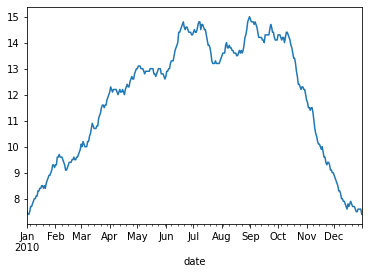

In [46]:
temp.variability.plot()

### 7. **Bonus**: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

<AxesSubplot:xlabel='date'>

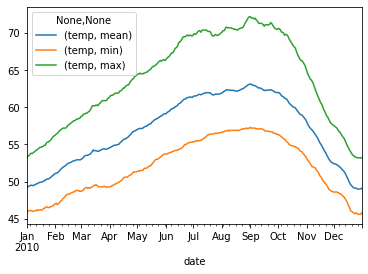

In [47]:
df.resample('d').agg(['mean','min','max']).plot()

<AxesSubplot:xlabel='date'>

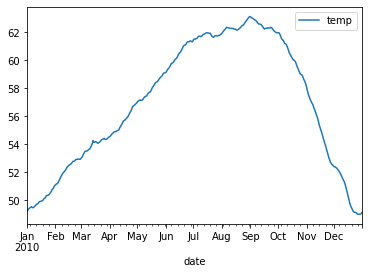

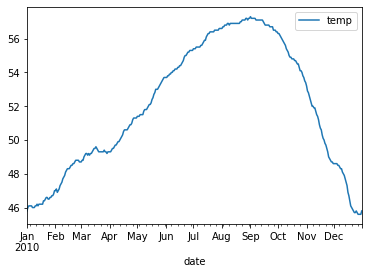

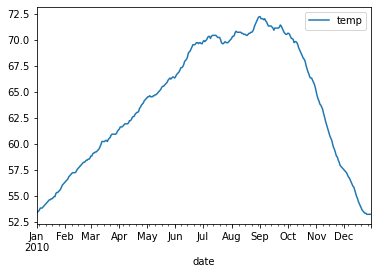

In [48]:
df.resample('d').mean().plot(label='avg')
df.resample('d').min().plot(label='min')
df.resample('d').max().plot(label='max')

```
from vega_datasets import data
data.seattle_weather()
```

Use the dataset to answer the following questions:



In [49]:
from vega_datasets import data
df = data.seattle_weather()

In [50]:
df.date = pd.to_datetime(df.date)
df = df.set_index('date')
df.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


### - Which year and month combination has the highest amount of precipitation?


In [59]:
df.resample('M').mean().precipitation.idxmax().strftime('%B, %Y')
## 2015-12-31

'December, 2015'

### - Visualize the amount of monthly precipitation over time.


<AxesSubplot:xlabel='date'>

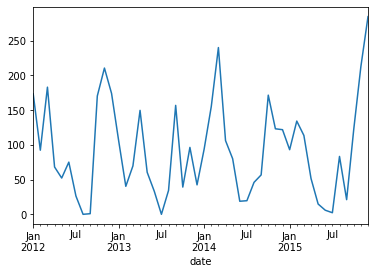

In [17]:
df.resample('M').sum().precipitation.plot()

### - Visualize the amount of wind over time. Choose a time interval you think is appropriate.


<AxesSubplot:xlabel='date'>

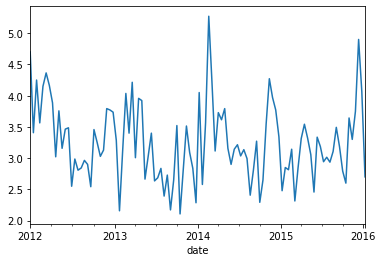

In [18]:
df.resample('2W').mean().wind.plot()

### - Which year-month combination is the windiest?


In [57]:
df.resample('M').mean().wind.nlargest().idxmax().strftime('%B, %Y')
#2014-02-28

'February, 2014'

### - What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)


In [20]:
df.groupby('weather').resample('Y').size()
#2014

weather  date      
drizzle  2012-12-31     31
         2013-12-31     16
         2014-12-31      0
         2015-12-31      7
fog      2012-12-31      5
         2013-12-31     82
         2014-12-31    151
         2015-12-31    173
rain     2012-12-31    191
         2013-12-31     60
         2014-12-31      3
         2015-12-31      5
snow     2012-12-31     21
         2013-12-31      2
sun      2012-12-31    118
         2013-12-31    205
         2014-12-31    211
         2015-12-31    180
dtype: int64

### - In which month does it rain the most?


In [21]:
df.groupby('weather').resample('M').size().loc['rain'].nlargest()
# 2012-11

date
2012-11-30    25
2012-12-31    23
2013-02-28    23
2012-03-31    19
2012-04-30    19
dtype: int64

In [22]:
df['month'] = df.index.month
df.groupby(['weather','month']).size().loc['rain'].nlargest()
# February

month
2     40
3     37
1     35
11    25
12    23
dtype: int64

### - Which month has the most number of days with a non-zero amount of precipitation?


In [23]:
df[df.precipitation > 0].groupby('month').count().precipitation.nlargest()
# December

month
12    81
2     73
3     73
11    71
1     66
Name: precipitation, dtype: int64


* * *



`data.flights_20k()` 



In [24]:
df = data.flights_20k()
df.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND


In [25]:
df.date = pd.to_datetime(df.date)

### - Convert any negative delays to 0.


In [26]:
df.loc[df.delay < 0, 'delay'] = 0
df.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,0,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,0,550,MSY,MCO
4,2001-03-30 21:45:00,0,229,STL,IND


### - Which hour of the day has the highest average delay?


In [27]:
df = df.set_index('date')

In [28]:
df['hour'] = df.index.hour
df.head()

,delay,distance,origin,destination,hour
date,,,,,
2001-01-13 14:56:00,32,417,SAN,SJC,14
2001-01-31 16:40:00,0,1093,FLL,ISP,16
2001-02-11 18:39:00,3,293,LBB,DAL,18
2001-01-10 21:00:00,0,550,MSY,MCO,21
2001-03-30 21:45:00,0,229,STL,IND,21


In [29]:
df.groupby('hour').mean().delay.nlargest()
## 3 AM

hour
3     302.500000
1     170.000000
0     127.916667
23     65.353846
22     32.704607
Name: delay, dtype: float64

### - Does the day of the week make a difference in the delay amount?


In [30]:
df['day'] = df.index.day_name()
df.head()

,delay,distance,origin,destination,hour,day
date,,,,,,
2001-01-13 14:56:00,32,417,SAN,SJC,14,Saturday
2001-01-31 16:40:00,0,1093,FLL,ISP,16,Wednesday
2001-02-11 18:39:00,3,293,LBB,DAL,18,Sunday
2001-01-10 21:00:00,0,550,MSY,MCO,21,Wednesday
2001-03-30 21:45:00,0,229,STL,IND,21,Friday


In [31]:
df.groupby('day').mean().delay.nlargest()

day
Friday       17.757596
Thursday     12.821322
Wednesday    11.032478
Sunday       10.413542
Tuesday       9.410866
Name: delay, dtype: float64

### - Does the month make a difference in the delay amount?

In [32]:
df['month'] = df.index.month_name()
df.head()

,delay,distance,origin,destination,hour,day,month
date,,,,,,,
2001-01-13 14:56:00,32,417,SAN,SJC,14,Saturday,January
2001-01-31 16:40:00,0,1093,FLL,ISP,16,Wednesday,January
2001-02-11 18:39:00,3,293,LBB,DAL,18,Sunday,February
2001-01-10 21:00:00,0,550,MSY,MCO,21,Wednesday,January
2001-03-30 21:45:00,0,229,STL,IND,21,Friday,March


In [33]:
df.groupby('month').mean().delay.nlargest

<bound method Series.nlargest of month
February    12.306106
January     11.301592
March        9.875287
Name: delay, dtype: float64>